# Introduction to statistics for Geoscientists (with Python)
### Lecturer: Gerard Gorman
### Lecture 5: Statistics and graphs - an introduction
### URL: [http://ggorman.github.io/Introduction-to-stats-for-geoscientists/](http://ggorman.github.io/Introduction-to-stats-for-geoscientists/)


## Aims and objectives of these lectures

Most of you will have done stats before - most probably not in detail. This section of course will be concerned with:

* Teaching you practical applications of stats.
* Teaching you how to use Python to undertake statistical analyses of data.
* Practise with graphing data in Python.

This course will **NOT** be concerned with mathematical theory underlying statistics. Goal is for you to pick up practical statistical skills and knowledge.

## What is statistics?
Statistics is the study of the collection, organisation, analysis and interpretation of data. It is comprised of methods for describing and analysing non-deterministic phenomena.

### What do we mean by this?

Deterministic phenomena - can be precisely predicted:

* Orbits of planets.
* Chemical reactions.

Non-deterministic phenomena - include randomness:

* Heights of people in the UK.
* Measurements of mineral ages in rock sample.
* Lengths of a certain fossil from a certain locality.


## Populations and distributions

Population - whole underlying universe of possible values. This is normally unattainable!

* Height measurements of all people in the UK.
* Lengths of EVERY fossil specimen from locality.

Distribution - shape of population histogram.

Lets have a look at a few examples:

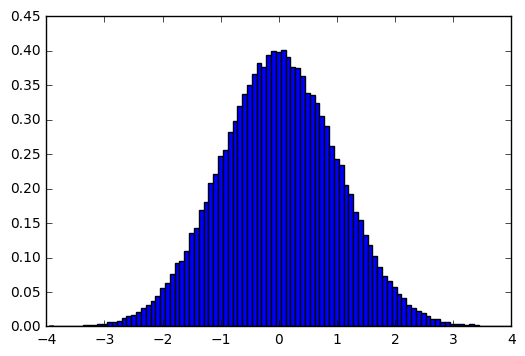

In [1]:
# Here we import the standard plotting library from matplotlib, and give it the
# moniker 'plt'. If you are used to using pylab, don't worry! The two modules
# can be used almost interchangeably.
from scipy import stats
import matplotlib.pyplot as plt

# This command simply ensures that all matplotlib windows are opened in the 
# notebook and not as pop-ups
%matplotlib inline

# Generate normal distribution.
x = stats.norm.rvs(size=100000)

# Plot a histogram
plt.hist(x, 100, normed=1)

# The histogram uses the input data of 'x', separates it into '100' bins and
# normalises it ('normed')
#   axis: x0,x1,y0, y1
plt.axis([-4, 4, 0, 0.45])

plt.show()

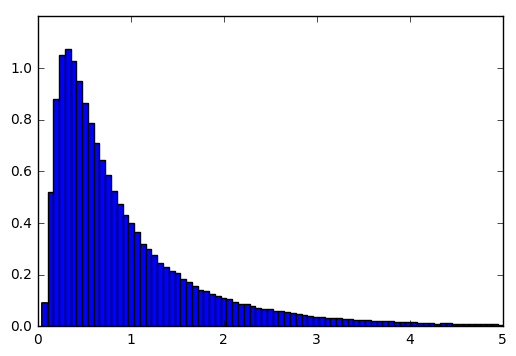

In [2]:
# Generate Wald distribution.
x = stats.wald.rvs(size=200000)

# Plot a histogram
plt.hist(x, 300, normed=1)
plt.axis([0, 5, 0, 1.2])
plt.show()

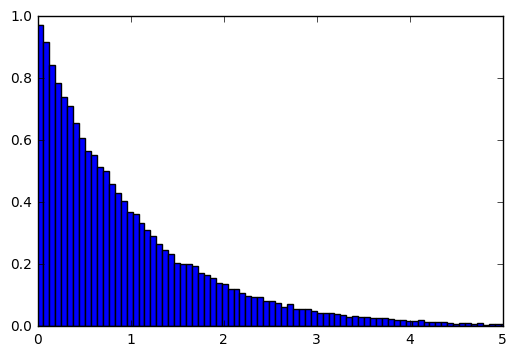

In [3]:
# Generate exponential distribution.
x = stats.expon.rvs(size=100000)

# Plot a histogram
plt.hist(x, 200, normed=1)
plt.axis([0, 5, 0, 1.0])
plt.show()


## Sample
A sample is a subset of the population that we have actually measured.

* Heights of all people in this room.
* Lengths of fossils in a collection.

Statistics involves using samples to represent populations.

Samples must be unbiased for statistics to be of any use!

## Biased sampling
Popular example: In the [1936 US Presidential Election](http://en.wikipedia.org/wiki/United_States_presidential_election,_1936), Literary Digest undertook a massive pre-election poll. They sent out 10 million questionnaires to list of names obtained from phone books and car-registration lists. The survey predicted a Republican landslide...actual result was biggest Democratic landslide in 20th centry - Roosevelt received 98.49% of the electoral vote, the highest percentage since the uncontested election of 1820. [Two key errors were made](http://en.wikipedia.org/wiki/United_States_presidential_election,_1936#Campaign): 
(1) only the better off owned cars and phones and were statistically more likely to vote Republican; (2) as the survey was voluntary typically only the really passionate voters who were unhappy with the status quo (i.e. Democrat) replied to the survey.

Are our first set of samples also likely to be biased?

* Heights of all people in this room.
* Lengths of fossils in a collection.

Are there better ways to sample these populations?

Not going to talk any more in this course about need for non-biased (random) samples. However, sample bias can get you into serious trouble so keep it in mind (consider these other fun examples: sampling bias in the fossil record; or the Caveman Effect).

## Branches of statistics

Two branches/classes of statistics:

**Descriptive statistics**: Numbers used to summarise samples (and hence hopefully populations) e.g. averages.

**Inferential statistics**: Methods for drawing conclusions from samples or combinations of samples, e.g. 'On basis of my samples, how likely is it that height and shoe size are related?'

In this lecture we will stick to descriptive statistics.

## Averages

Averages are *measures of central tendency*. Several types of average exist. The most commonly used are:

* **Mean** (technically arithmetic mean).

In [4]:
import numpy as np 

values = np.array([1, 3, 5, 2, 4, 7, 2, 6, 8, 3, 2, 3, 5])

# Here we use conditional formatting. We add curly braces in the string, and whatever 
# is in '.format()' will be inserted in their place.
print "Mean = {}".format(np.mean(values))

Mean = 3.92307692308


* **Median**: middle value when numbers ordered.

In [5]:
# Here there are two sets of braces, and format has two arguments. This way you can
# insert multiple strings, lists, and floats into a string!
print "Sorted array = {}, Median = {}".format(np.sort(values), np.median(values))


Sorted array = [1 2 2 2 3 3 3 4 5 5 6 7 8], Median = 3.0


In this example there are 13 numbers so the median is the $7^{th}$ number in the sorted array. If there were 14 numbers (e.g. the number 10 was appended to the array) then the median would be the mean of $7^{th}$ and $8^{th}$ values, i.e. 3.5 in this case.
* **Mode**: most common value.

In [6]:
# Although we have not gone far we quickly find that we have to look for
# python's stats module to provide a method for the the mode.
from scipy import stats

mode, count = stats.mode(values)

print "Mode = {}".format(mode)


Mode = [2]


Note that for when there are multiple modes, only the first is returned.

The mean and the median are the two most common averages. The advantages of median over the mean are:

* May be better for skewed distributions.
* Reduces effect of outliers.
* Don’t need to know values of end-values.

In practice the mode much more rarely used.

## Measures of spread

There is much more to a distribution than average. These samples have the same mean and median:

In [7]:
values1 = np.array([-0.2, -0.1, -0.1, 0.0, 0.0, 0.0 , 0.1 , 0.1 , 0.2])
print "values1 mean = {}, median = {}".format(np.mean(values1), np.median(values1))

values2 = np.array([-1000, -500, 0, 500, 1000])
print "values2 mean = {}, median = {}".format(np.mean(values2), np.median(values2))

values1 mean = 0.0, median = 0.0
values2 mean = 0.0, median = 0.0


...but they have very different spread:

In [8]:
print "values1 spread = ", np.ptp(values1)
print "values1 spread = ", np.ptp(values2)

values1 spread =  0.4
values1 spread =  2000


## Percentile
This is best explained with distributions - lets first define a normal distribution:

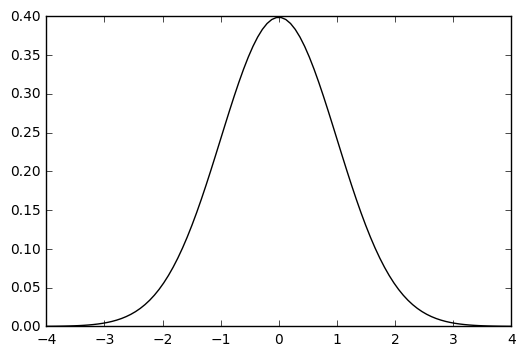

In [9]:
mu, std = 0, 1
xmin, xmax = [-4, 4]
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k')
plt.show()

The 20th percentile indicates that 20% of all values are lower than this value - the shaded region below:

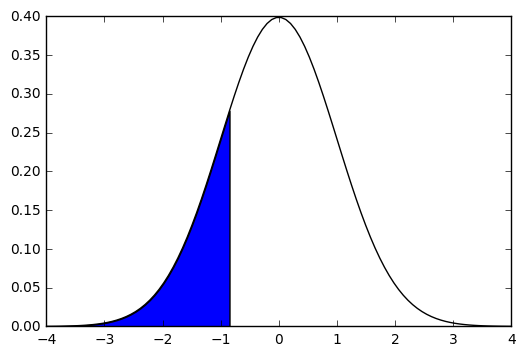

In [10]:
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.2)))
plt.show()

There are four percentiles that get their own name:
* 25th percentile is also known as the first quartile (Q1)
* 50th percentile as the median or second quartile (Q2)
* 75th percentile as the third quartile (Q3) 
* Interquartile (IQ) range range from Q1 to Q3.

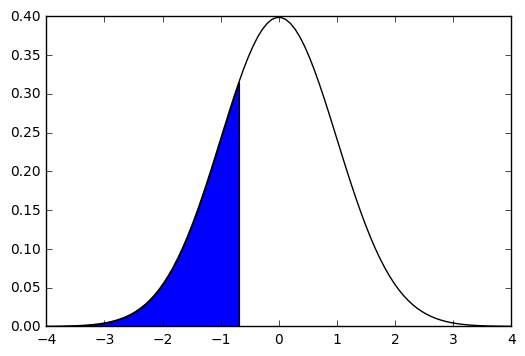

In [11]:
# First quartile (Q1)
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.25)))
plt.show()

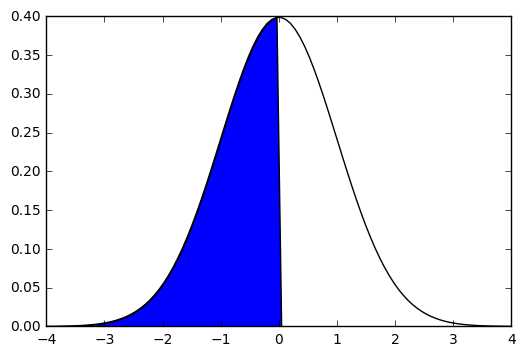

In [12]:
# Median or second quartile (Q2)
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.5)))
plt.show()

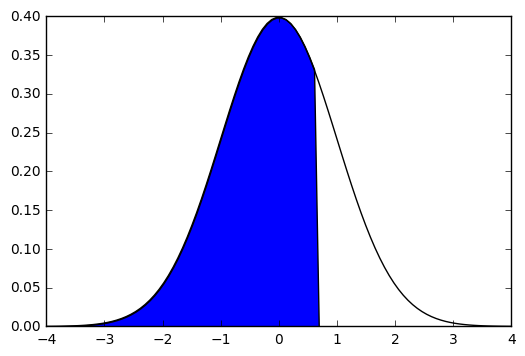

In [13]:
# Third quartile (Q3)
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.75)))
plt.show()

-0.674489750196
0.674489750196


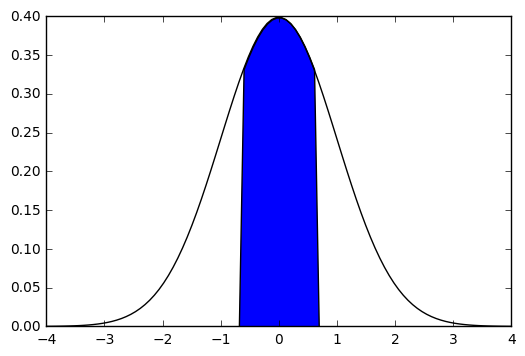

In [14]:
# * Interquartile (IQ) range range from Q2 to Q3.
plt.plot(x, p, 'k')

plt.fill_between(x, 0, p, interpolate=True,
                 where=((x>=stats.norm.ppf(0.25)) & (x<=stats.norm.ppf(0.75))))
print stats.norm.ppf(0.25)
print stats.norm.ppf(0.75)


plt.show()

## Variance and standard deviation

These are the most commonly used measures of spread. The sample variance is:

$$ v = \frac{1}{N-1} \sum_{i=1}^{N} \left( x_i - \bar{x}\right)^2 ,$$

where $N$ is the number of measurements, $x_i$ is the individual measurement and $\bar{x}$ is the sample mean. We can interpret this expression (almost) as the average of squared distances from the sample mean. Indeed, this intuitively gives us the spread. However, rather than the expected $\frac{1}{N}$ we have $\frac{1}{N-1}$. This is known as Bessel’s correction and it corrects the bias in the estimation of the population variance.

The sample standard deviation is the square root of the sample variance: $s = \sqrt{v}$. It gives a measure of spread in the same units as the measurements themselves.

# Exercise 5.1

If you need remind yourself of how to get started using iPython see the [introduction to programming lecture](http://ggorman.github.io/Introduction-to-programming-for-geoscientists/) from the first term.

1. Inspect the file [qzpercentages.csv](https://raw.githubusercontent.com/ggorman/Introduction-to-stats-for-geoscientists/gh-pages/data/qzpercentages.csv) (use !cat or %cat qzpercentages.csv for example).
2. Write a program to read in the data. **Before launching into writing your own read function from first principles for reading .csv files consider if there is already a *right way* of doing this.** The same sage advice applies to all tasks given here.
3. Calculate the mean, median, range, interquartile range, standard deviation, variance, and mode.

In [15]:
# Develop your solution here...


# Plotting graphs

In this course we will be using matplotlib for plotting. 

Within iPython remember to start your programs with the command:

In [16]:
%matplotlib inline

## Bar charts

Bar charts are a common chart type. They are used for plotting discrete data, e.g.:

* Shoe-size.
* Countries.

Bar charts should not be confused with histograms. In the example here we have fossil species from a certain locality.

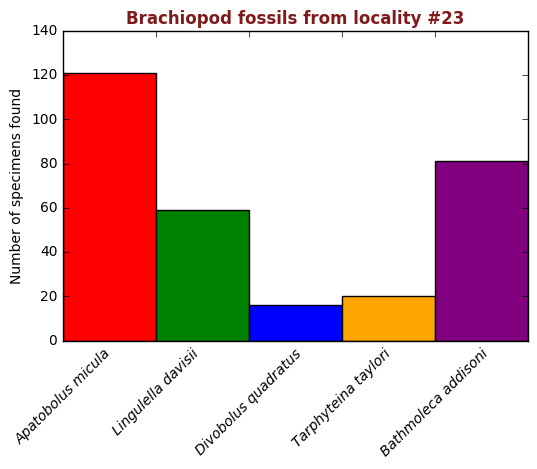

In [17]:
# Sample program for bar chart of relative abundances of 5 species of fossil from a locality

# Finds of each fossil
bardata = np.array([121, 59, 16, 20, 81])       
species=["Apatobolus micula", "Lingulella davisii", "Divobolus quadratus",
         "Tarphyteina taylori", "Bathmoleca addisoni"]

# Colours to be used in bar chart
colours=["red", "green", "blue", "orange", "purple"]        

# Set up chart with 5 bars using my values and colours
plt.bar([1, 2, 3, 4, 5], bardata, 1, 0, color=colours)

# Add datalabels to x-axis
plt.xticks([1, 2, 3, 4, 5],species, rotation=45, style='italic')

# Title for y axis.
plt.ylabel("Number of specimens found")

# Title for chart.
plt.title("Brachiopod fossils from locality #23", weight='bold', color=(.5, .1, .1))
plt.show()


## Histograms

Histograms are a way to summarize distributions. The distribution is split into categories or *bins* - usually of equal size. The size of the bins is arbitrary - whatever works best for the task at hand.

The number of samples falling into each bin are counted - this is the frequency. They are then plotted as adjacent rectangles akin to a bar-chart. The profile of a histogram approximates probability distribution of the population.

# Exercise 5.2

Generate a histogram from [qzpercentages.csv](https://raw.githubusercontent.com/ggorman/Introduction-to-stats-for-geoscientists/gh-pages/data/qzpercentages.csv).

Your histogram should include the following features:

1. Label the x and y axis.
2. Need to fix x-axis labels to make sure all bins are labelled.
3. Need to fix y-axis ticks to avoid ‘0’ crashing into ’20’.
4. Specify the number of bins.
5. Increas the line thickness in your plot.
6. Specify the colour.
7. Add a title.

In [18]:
# Solutions here...

# Exercise 5.3

Now that you have made a bar chart and a histogram, let's try making another simple statistical plot.
A pie chart! As you are aware, pie charts are a simple way of showing the relative sizes of data in a
given set. Pie charts are easy to make in matplotlib, and only require one function. Most functions in matplotlib use similar, if not identical, arguments to do certain things, like 'color' in the bar chart example. This can be used to decipher which arguments a function might take!

Although there are no examples of pie charts in this page, it is relatively simple and can be found in the matplotlib docs [here](http://matplotlib.org/api/pyplot_api.html). The function is matplotlib.pylot.pie(...)

Use the data below and:

1. Make a pie chart
2. Make the pie chart circular and not an ellipse
3. Make the pie chart use the correct colours for the joke to work
4. Rotate the chart such that the joke is clear
5. Add labels to each section, such that anyone will get it
6. Add a title as the icing on the cake

**BONUS**
7. 'explode' the small wedge, and give it shadow.

**HINT**

Start simple, and build up. REMEMBER: The online docs will give the function with ALL 
its possible arguments. However only those without an equals sign (e.g. plt.xxx(X,label=...)) are mandatory (X in this case). Those with an equals sign (label) are not required for the function to work, but allow for more
customisation should you wish it.

Most of the tricks you will use here are applicable on other plots and figures throughout this course, do not forget them as they can make your life easier later.

In [19]:
import matplotlib.pyplot as plt
 
# This is your data to plot
data = np.array([['Pacman','not Pacman'],[270, 90]])
